In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#collect emojis from the internet
#create an .csv file to represent emojis and their classes in unicode
#create a function to convert an emoji into a black and white images 
#display the frequency distribution among the categories
#use simple emojis to train the dataset and categories
#use the strange emojis to test the dataset
#I have deduced to divide emojis into these categories [happy, sad, neutral, sick, love, fear, angry, alien, hand, body, person, action, surprised, family, profession, heart, animal, fruit, building, transport, clock, moon, clothes]

In [3]:
root = '.'
path = os.path.join(root, 'archive')

In [4]:
df = pd.read_csv(os.path.join(path,'emoji_classified.csv'))

In [5]:
df = df.drop('#', axis = "columns")

In [6]:
df #how to drop the emoji names with several unicode representations? Create a function to clean the emoji 

,emoji,unicode,name
0,😀,U+1F600,happy
1,😃,U+1F603,happy
2,😄,U+1F604,happy
3,😁,U+1F601,happy
4,😆,U+1F606,happy
...,...,...,...
946,🌘,U+1F318,moon
947,🌙,U+1F319,moon
948,🌚,U+1F31A,moon
949,🌛,U+1F31B,moon


In [7]:
def clean_unicode_column(word):
    return word.split()[0]

In [8]:
df["unicode"] = df["unicode"].apply(clean_unicode_column)

In [9]:
for i in range(len(df.unicode)):
    word = df.unicode[i]
    word = word.replace("+","000")
    df.unicode[i] = word

In [10]:
from PIL import Image, ImageFont, ImageDraw

In [11]:
def emoji_unicode_to_image(emoji):
    size  = 64
    image = Image.new("L", (64,64), (255))
    font = ImageFont.truetype("Noto_Emoji/NotoEmoji-VariableFont_wght.ttf", int(size * 0.9), encoding='unic')
    draw = ImageDraw.Draw(image)
    draw.textbbox(xy=[0,0], text=emoji, font=font)
    draw.text((0, 0), emoji, fill=(0), font=font)
    return image
#     plt.imshow(image, cmap = 'gray')
#     plt.show()

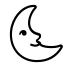

In [12]:
emoji_unicode_to_image(df.emoji[950])
# Display the image
# plt.imshow(img)
# plt.show()


<Axes: xlabel='name'>

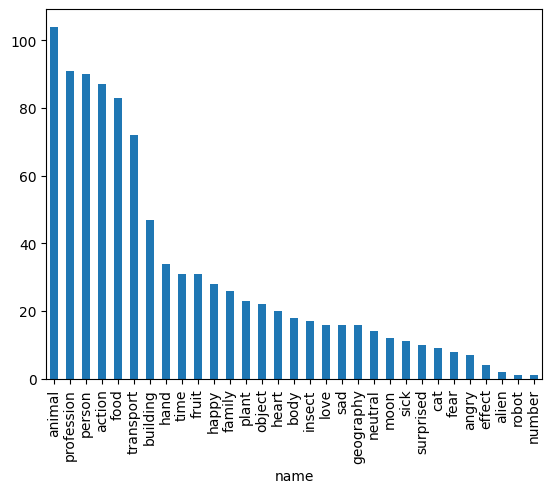

In [13]:
df["name"].value_counts().plot(kind = "bar") #does not look good so decided to try seaborn

In [14]:
import seaborn as sns 

C:\Programs\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


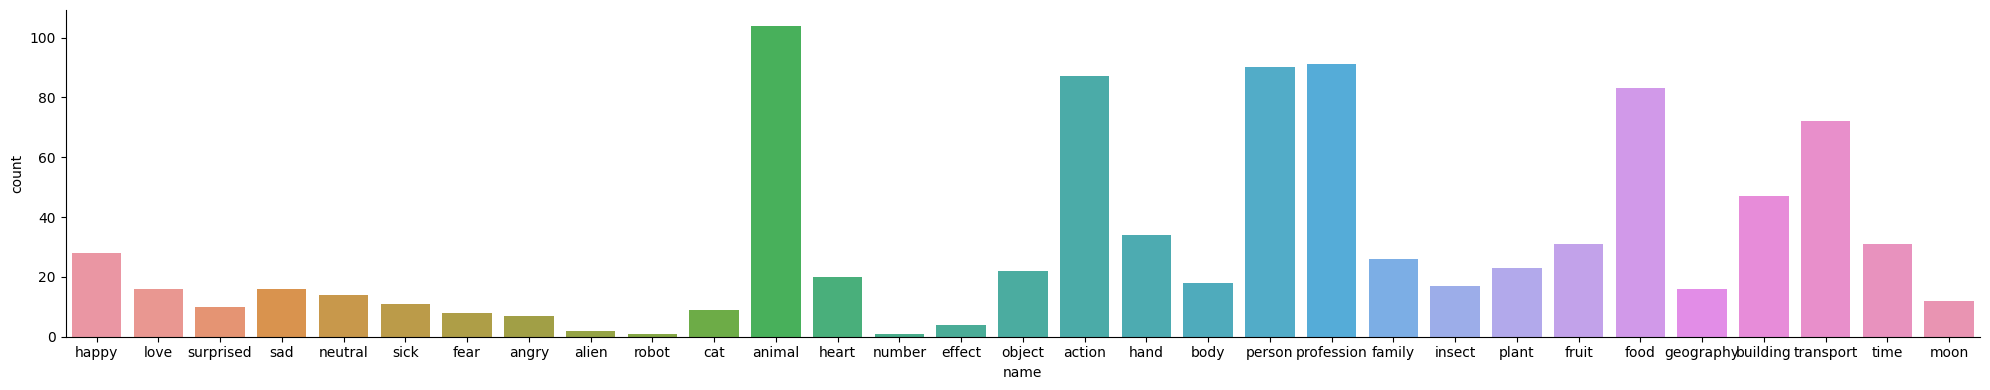

In [15]:
sns.catplot(data=df, kind = 'count', x='name', height = 4, aspect = 5)

In [16]:
len(df.name.value_counts()) #32 different categories

31

In [17]:
#generate a dataframe with the picture images from the emoji. Images to classes pairings

In [18]:
df_new = pd.DataFrame(columns = ['picture', 'name'])

In [19]:
X = []
y = []

In [20]:
for i in range(len(df["emoji"])):
    img = emoji_unicode_to_image(df["emoji"][i])
    name = df["name"][i]
    img_array = np.array(img).flatten()
    X.append(img_array)
    y.append(name)

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
temp_image_array = np.reshape(X[0], (-1, 64)) #to check if images are ok, no error has been done

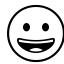

In [23]:
display(Image.fromarray(temp_image_array))

In [24]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\1822040677.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(temp_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


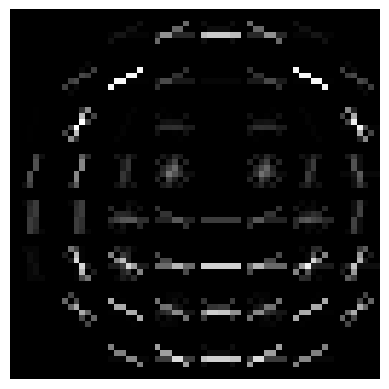

In [25]:
temp_image = Image.fromarray(temp_image_array)
fd, hog_image = hog(temp_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\3942123429.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(temp_image, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)


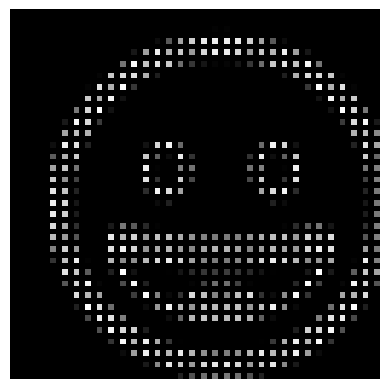

In [26]:
fd, hog_image = hog(temp_image, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")#data does not have a lot of noise, so the cell size it set to be 2x2, otherwise it would be too rough

In [27]:
X_new = []
for img_array in X:
    img = np.reshape(img_array, (-1,64))
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)
    X_new.append(fd)

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\3298318594.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)


In [28]:
X_new = np.array(X_new)

In [29]:
from sklearn.model_selection import cross_val_score #to compare two models - kNN classifier and SVM.
from sklearn.model_selection import KFold 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
#using validation choose the best model 
#using the grid search choose the best hyperparameters

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [345]:
# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

# # predict on the validation set.
# y_pred = svm.predict(X_val)

# # calculate accuracy.
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%') #very bad accuracy

Accuracy: 10.47%


In [32]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

svc = SVC(kernel="linear")

#use k-fold CV to evaluate model
scores_svc = cross_val_score(svc, X_new, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(np.mean(np.abs(scores_svc)) * 100)

56.04188481675394


In [33]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_new, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(np.mean(np.abs(scores_knn)) * 100)

29.760815651694685


In [35]:
rf = RandomForestClassifier()
scores_rf = cross_val_score(rf, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(np.mean(np.abs(scores_rf)) * 100)

49.42077707357399


In [36]:
svc_img = SVC(kernel="linear")

#use k-fold CV to evaluate model
scores_svc_img = cross_val_score(svc_img, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(np.mean(np.abs(scores_svc_img)) * 100)

48.26398456875172


In [37]:
knn_img = KNeighborsClassifier()
scores_knn_img = cross_val_score(knn_img, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(np.mean(np.abs(scores_knn_img)) * 100)

35.010195646183526


In [38]:
svc = SVC(kernel="linear")

#use k-fold CV to evaluate model
scores_svc = cross_val_score(svc, X_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(np.mean(np.abs(scores_svc)) * 100) #better of all to choose the SVC

53.68421052631579


In [39]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
y_hat = svc.predict(X_val)
accuracy = accuracy_score(y_val, y_hat)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 56.54%


In [370]:
#get the unseen emojis from the emoji kitchen and try them out
#get the facial expression and test them out
#write the report

In [41]:
filenames = os.listdir("archive/emoji_kitchen")
filenames

['.ipynb_checkpoints',
 'alien.jpg',
 'angry.jpg',
 'animal.jpg',
 'building.jpg',
 'fruit.jpg',
 'happy.jpg',
 'insect.jpg',
 'love.jpg',
 'sad.jpg',
 'surprised.jpg']

In [48]:
emoji_kitchen_images = []
for filename in filenames[1:]:
    img = Image.open(os.path.join("archive/emoji_kitchen", filename)).convert("L")
    img = img.resize((64,64))
    emoji_kitchen_images.append(img)

In [49]:
y_emoji = []
for filename in filenames:
    label = filename.replace(".jpg", "")
    y_emoji.append(label)

In [56]:
y_emoji = y_emoji[1:]

In [77]:
X_emoji_kitchen_hog = []
for img in emoji_kitchen_images:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)
    X_emoji_kitchen_hog.append(fd)

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\2408898317.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)


In [78]:
emoji_kitchen_pred = svc.predict(X_emoji_kitchen_hog)

In [79]:
accuracy = accuracy_score(emoji_kitchen_pred, y_emoji)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 20.00%


In [80]:
emoji_kitchen_pred #animal category is super extra-represented, therefore it favours that category. 

array(['animal', 'food', 'animal', 'building', 'food', 'food', 'food',
       'food', 'animal', 'animal'], dtype='<U10')

In [62]:
filenames_facial_expression = os.listdir("archive/facial_expression")
filenames_facial_expression

['angry.jpg',
 'fear.jpg',
 'happy.jpg',
 'neutral.jpg',
 'sad.jpg',
 'surprised.jpg']

In [65]:
facial_expression_images = []
y_fe = []
for filename in filenames_facial_expression:
    img = Image.open(os.path.join("archive/facial_expression", filename)).convert("L")
    img = img.resize((64,64))
    facial_expression_images.append(img)
    label = filename.replace(".jpg", "")
    y_fe.append(label)

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\1954494409.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)


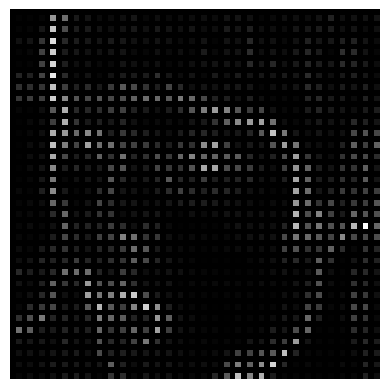

In [82]:
X_fe = []
for img in facial_expression_images:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)
    plt.axis("off")
    plt.imshow(hog_image, cmap="gray")
    X_fe.append(fd)

In [74]:
y_fe_pred = svc.predict(X_fe) #predictions
accuracy = accuracy_score(y_fe_pred, y_fe)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.00%


In [76]:
y_fe_pred

array(['animal', 'animal', 'animal', 'animal', 'animal', 'animal'],
      dtype='<U10')

C:\Users\Alibek\AppData\Local\Temp\ipykernel_43340\3032839411.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(facial_expression_images[3], orientations=8, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)


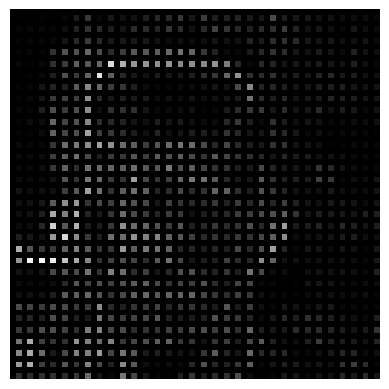

In [92]:
fd, hog_image = hog(facial_expression_images[3], orientations=8, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True, multichannel=False)
plt.axis("off")
plt.imshow(hog_image, cmap="gray") #images are too low quality to be effectively feauture extracted with HOG, therefore the accuracy is really low

In [97]:
rf_img = RandomForestClassifier()
scores_rf_img = cross_val_score(rf_img, X_new, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(np.mean(np.abs(scores_rf_img)) * 100)

51.94599063102784


In [106]:
total_scores  = {"knn score hog": np.mean(scores_knn), "knn score image": np.mean(scores_knn_img), "rf score hog": np.mean(scores_rf), "rf score image": np.mean(scores_rf_img), "svc score hog": np.mean(scores_svc), "svc score img": np.mean(scores_svc_img)}

In [107]:
total_scores.get("knn score hog")

0.29760815651694683

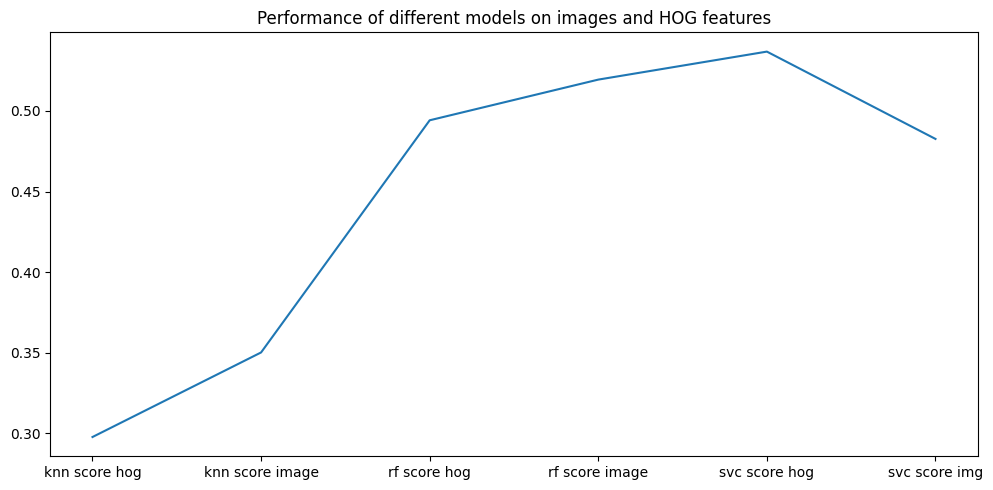

In [126]:
plt.figure(figsize=(10,5))
plt.title("Performance of different models on images and HOG features")
plt.tight_layout()
plt.plot(list(total_scores.keys()),list(total_scores.values()))
plt.show()